
--- ESTADO INICIAL ---


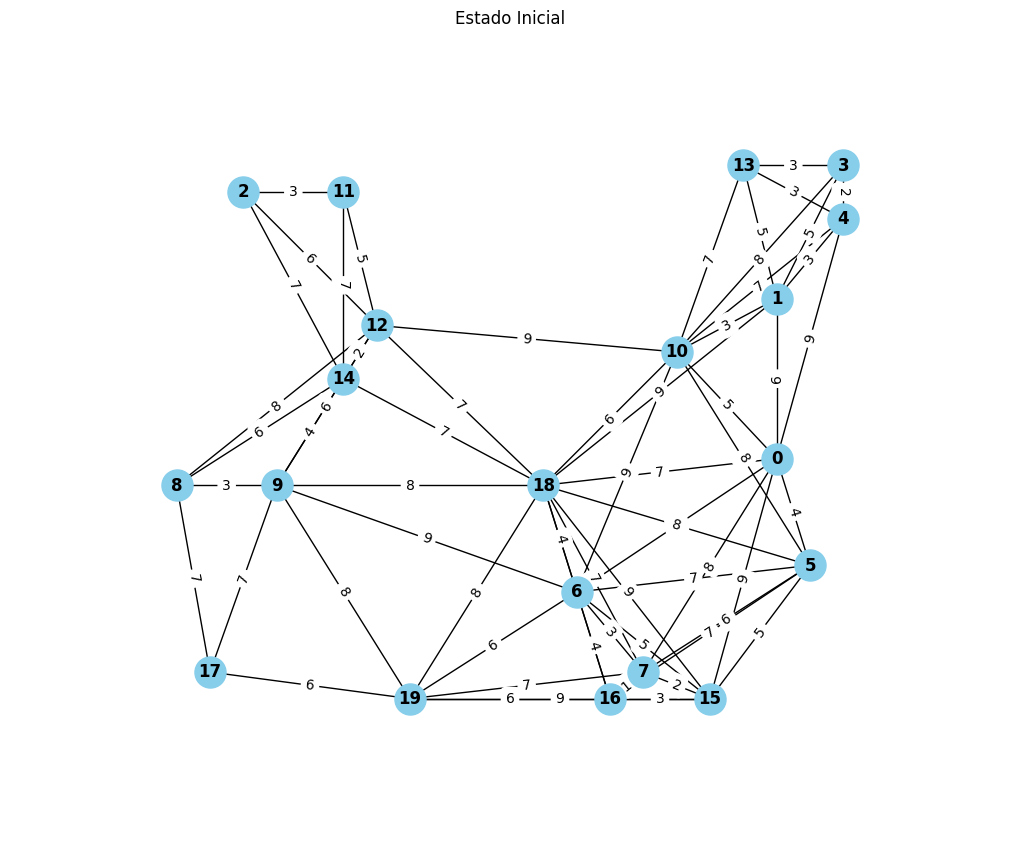


Ruta más corta inicial de 0 a 3: ['0', '1', '3'], Distancia: 11

--- SIMULANDO MOVIMIENTO ---
[[18, 9], [18, 15], [2, 19], [20, 20], [20, 18], [19, 5], [12, 4], [14, 1], [0, 8], [3, 8], [15, 13], [5, 19], [6, 14], [17, 20], [5, 12], [16, 0], [13, 0], [1, 1], [11, 8], [7, 0]]
[[18, 9], [18, 15], [2, 19], [20, 20], [20, 18], [19, 5], [12, 4], [14, 1], [0, 8], [3, 8], [16, 14], [5, 19], [6, 14], [17, 20], [5, 12], [16, 0], [13, 0], [1, 1], [11, 8], [7, 0]]
[[17, 10], [18, 15], [2, 19], [20, 20], [20, 18], [19, 5], [12, 4], [14, 1], [0, 8], [3, 8], [16, 14], [5, 19], [6, 14], [17, 20], [5, 12], [16, 0], [13, 0], [1, 1], [11, 8], [7, 0]]
[[17, 10], [18, 15], [2, 19], [21, 19], [20, 18], [19, 5], [12, 4], [14, 1], [0, 8], [3, 8], [16, 14], [5, 19], [6, 14], [17, 20], [5, 12], [16, 0], [13, 0], [1, 1], [11, 8], [7, 0]]
[[17, 10], [18, 15], [2, 19], [21, 19], [20, 18], [19, 5], [12, 4], [14, 1], [0, 8], [3, 8], [15, 15], [5, 19], [6, 14], [17, 20], [5, 12], [16, 0], [13, 0], [1, 1], [11, 8], 

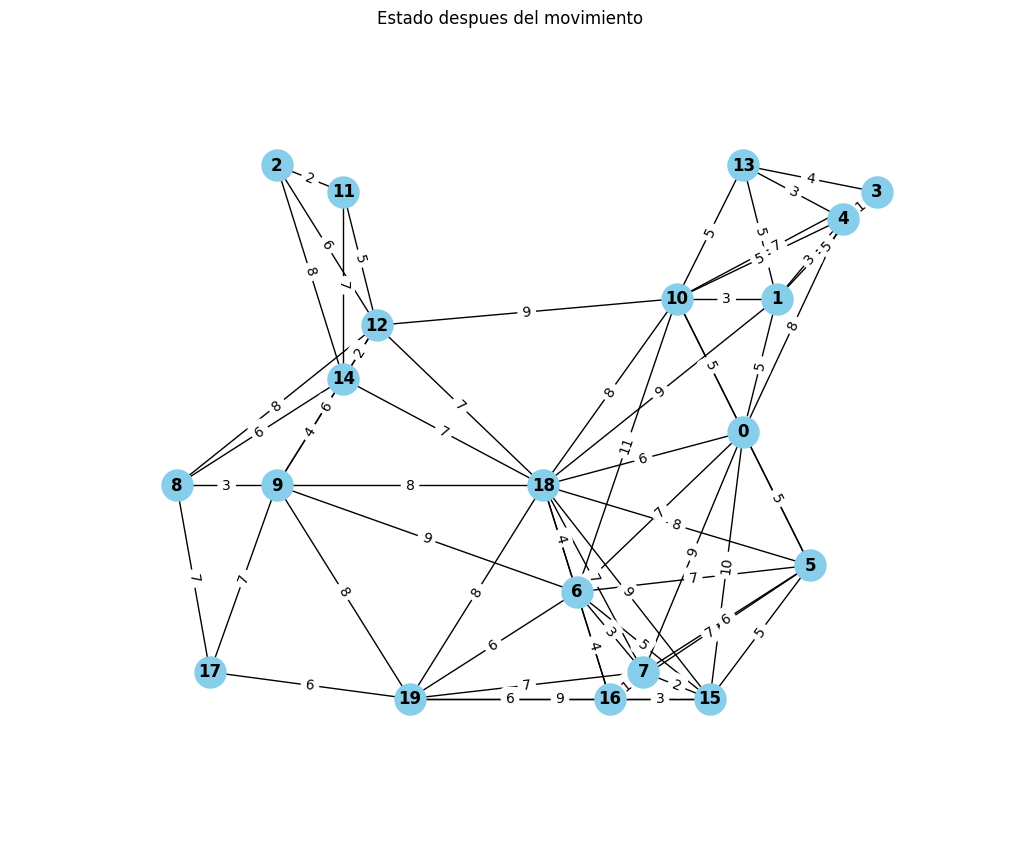


Ruta más corta final de 0 a 3: ['0', '4', '3'], Distancia: 9


In [4]:
from Graph import Graph
from Raro import *

# conf inicial
cantidad_nodos = 20
area_x, area_y = 20, 20
tolerancia_conexion = 10

# nodos y enlaces
nodos = inicializar_nodos(cantidad_nodos, area_x, area_y)
enlaces = []
generar_conexiones(nodos, enlaces, tolerancia_conexion)

# objeto clase grafo y objeto clase de NetwoekX, esta ultima se encarga de visualizar el grafo

G = crear_grafo(nodos, enlaces)  # Grafo NetworkX para visualización
g = Graph(len(nodos))  # Grafo para Dijkstra

# Configurar grafo de Dijkstra
#NOTAR QUE SE AGREGAR EL LA ETIQUETA SEGUIDO DEL IDENTIFICADOR DEL GRAFO
for i in range(len(nodos)):
    g.add_vertex_data(i, str(i))

for nodo1, nodo2, peso in enlaces:
    g.add_edge(nodo1, nodo2, peso)

# VISULIZAR inicial
print("\n--- ESTADO INICIAL ---")
visualizar_red(G, area_x, area_y, "Estado Inicial")

# Calcular ruta corta inicial ESTA DEBERIA CALCULARSE DESDE EL NODO Tx HASTA EL NODO Rx
try:
    distance, path = g.dijkstra('0', '3')
    print(f"\nRuta más corta inicial de 0 a 3: {path}, Distancia: {distance}")
except ValueError as e:
    print(f"\nError al calcular ruta inicial: {e}")

# Simular movimiento EN ESTE CASO SE SIMULAN 3 CAMBIOS DE POSICION
print("\n--- SIMULANDO MOVIMIENTO ---")
generar_movimiento(nodos, enlaces, 5, cantidad_nodos, area_x, area_y)

# DADO QUE HUBO UN MOVIMIENTO SE LIBERA LA MEMORIA de G y g, se vuelven a definir dado la lista nodos y enalces, ESTAS SE ACTUALIZAN
del G
del g


#Se actualiza los grafos (ambos objetos) del movimiento, iniciando desde cero una nueva configuacion
G = crear_grafo(nodos, enlaces)
g = Graph(len(nodos))  # Reiniciar grafo de Dijkstra

for i in range(len(nodos)):
    g.add_vertex_data(i, str(i))

for nodo1, nodo2, peso in enlaces:
    g.add_edge(nodo1, nodo2, peso)

print("\n--- ESTADO FINAL ---")
visualizar_red(G, area_x, area_y, "Estado despues del movimiento")

# Calcular ruta sol cuando se deberia mandar un mensaje
try:
    distance, path = g.dijkstra('0', '3')
    print(f"\nRuta más corta final de 0 a 3: {path}, Distancia: {distance}")
except ValueError as e:
    print(f"\nError al calcular ruta final: {e}")

#SOLO SE CALCULA EL CAMINO OPTIMO UNA VEZ QUE SE DESEA MANDAR UN MENSAJE, ES EN ESTE MOMENTO QUE SE RECALCULAN LAS TABLAS DE ENRRUTAMIENTO